In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain_community.document_loaders import PyMuPDFLoader
loader = PyMuPDFLoader('SUNNY_2023_ESG.pdf')
docs = loader.load()
print(len(docs))

110


In [4]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap =50)
split_docs = text_splitter.split_documents(docs)
print(len(split_docs))

587


In [5]:
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
embedding = OpenAIEmbeddings()
vectorstore = FAISS.from_documents(documents = split_docs, embedding = embedding)
vectorstore.similarity_search(
    'E와 G와 관련된 문서들 가져와봐', k=4
)

[Document(id='8b3d9418-e829-4022-9575-adfd243b459a', metadata={'producer': 'Adobe PDF library 16.00', 'creator': 'Adobe Illustrator 25.4 (Macintosh)', 'creationdate': '2024-04-20T17:34:04+08:00', 'source': 'SUNNY_2023_ESG.pdf', 'file_path': 'SUNNY_2023_ESG.pdf', 'total_pages': 110, 'format': 'PDF 1.4', 'title': '舜宇光学2023年ESG报告-英文版0420', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-04-21T09:27:36+08:00', 'trapped': '', 'modDate': "D:20240421092736+08'00'", 'creationDate': "D:20240420173404+08'00'", 'page': 79}, page_content='79\n2023 \nEnvironmental, Social and\nGovernance Report\nEnvironmental, Social and\nGovernance Report'),
 Document(id='d51e61ca-c2dd-4afe-8dc4-6e80b805b0f9', metadata={'producer': 'Adobe PDF library 16.00', 'creator': 'Adobe Illustrator 25.4 (Macintosh)', 'creationdate': '2024-04-20T17:34:04+08:00', 'source': 'SUNNY_2023_ESG.pdf', 'file_path': 'SUNNY_2023_ESG.pdf', 'total_pages': 110, 'format': 'PDF 1.4', 'title': '舜宇光学2023年ESG报告-英文版0420', 'author':

## 검색 증강 단계
1. 사용자 질문(Query)
1. 검색 (Retrieve)
1. LLM
1. 최종 답변

In [13]:
from dotenv import load_dotenv
load_dotenv()

True

In [34]:
from langchain_openai import ChatOpenAI
from pprint import pprint

llm = ChatOpenAI(model = 'gpt-3.5-turbo-1106')

messages = [
    {'role':'system','content':'You are a helpful assistant'},
    {'role':'user','content':'who won the world series in 2020?'}
]
response = llm.invoke(messages)
for msg in response:
    pprint(msg)

('content',
 'The Los Angeles Dodgers won the World Series in 2020, defeating the Tampa '
 'Bay Rays.')
('additional_kwargs', {'refusal': None})
('response_metadata',
 {'finish_reason': 'stop',
  'id': 'chatcmpl-CEXFUDgHIEwaZJXa88aMmI7cMtDb9',
  'logprobs': None,
  'model_name': 'gpt-3.5-turbo-1106',
  'service_tier': 'default',
  'system_fingerprint': 'fp_982035f36f',
  'token_usage': {'completion_tokens': 19,
                  'completion_tokens_details': {'accepted_prediction_tokens': 0,
                                                'audio_tokens': 0,
                                                'reasoning_tokens': 0,
                                                'rejected_prediction_tokens': 0},
                  'prompt_tokens': 26,
                  'prompt_tokens_details': {'audio_tokens': 0,
                                            'cached_tokens': 0},
                  'total_tokens': 45}})
('type', 'ai')
('name', None)
('id', 'run--364b1f0f-3fb8-46cf-ad90-f6e1fc4682

## 챗GPT 응답 결과 확인하기
- 챗GPT의 응답 내용을 출력하는 코드
- 출력 내용을 보면, response의 가장 상위에 choices, created, id, model, object, system_fingerprint, usage라는 키
- choices는 리스트 값으로 갖고 있고 그 내부에 딕셔너리 데이터 구조가 있다.

### 프롬프트 엔지니어링- LLM을 사용할 떄 매개변수의 의미와 효과에 대해 이해
- 프롬프트, 프롬프트 엔지니어링, 플레이그라운드, Temperature, Top P
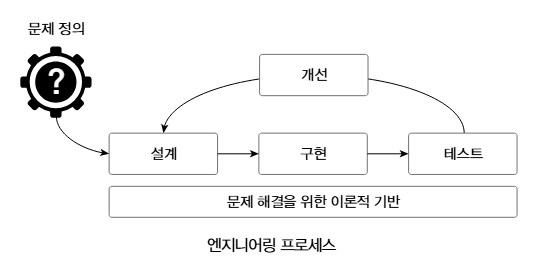
#### 프롬프트의 의미
- 엔지니어링 프로세스와 마찬가지로 문제를 정의, 설계를 진행한 후 구현하고 테스트하는 것을 반복, 개선
- 프롬프트 엔지니어링이라는 용어를 자주 사용


### Temperature는 선택할 단어들에 대한 확률분포의 모양새를 얼마나 뾰족하게 만들지, 또는 얼마나 펑퍼짐하게 할지 정하는 값
- 1보다 작으면 뾰족하게 만들고 1보다 크면 펑퍼짐하게 만들어진다.
- Top P는 다음 단어를 서낵할때, 후보군 중에서 확률이 높은 단어만 취하고, 확률이 낮은 단어는 버리는 방식
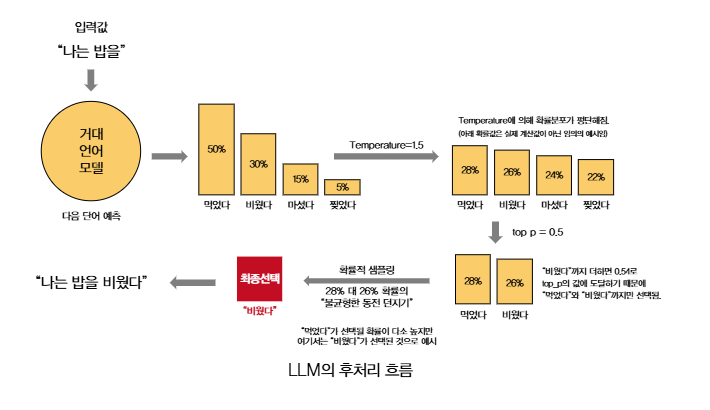

### Maximum length
- Maximum length는 인공지능이 한 번에 말하는 대화의 크기
- 언어 모델에서 대화의 크기는 토큰의 수를 의미